In [3]:
import pandas as pd
import numpy as np

income = pd.read_csv("https://raw.githubusercontent.com/pamuba/PythonDE/main/income.csv")
income

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000"
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31973,34,Local-gov,HS-grad,Never-married,Farming-fishing,Not-in-family,Black,Male,594,0,60,United-States,"less than or equal to 50,000"
31974,34,Local-gov,Some-college,Never-married,Protective-serv,Not-in-family,White,Female,0,0,40,United-States,"less than or equal to 50,000"
31975,23,Private,Some-college,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,"less than or equal to 50,000"
31976,42,Local-gov,Some-college,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,40,United-States,"less than or equal to 50,000"


In [19]:
def income_model_prep(data):
    from sklearn.model_selection import train_test_split
    data = pd.get_dummies(
        data.assign(
            target = np.where(data["SalStat"] == " less than or equal to 50,000",0,1),
            nativecountry = data["nativecountry"].replace({" Holand-Netherlands":" Germany"}),
            occupation = data["occupation"].replace({" Armed-Forces":" ?"}),
            JobType = data["JobType"].replace({" Never-worked":" Without-pay"}),
        ).drop("SalStat", axis=1),
        drop_first = True
    )
    X = data.drop("target", axis=1)
    y = data["target"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    return X_train, X_test, y_train, y_test

In [ ]:
X_train, X_test, y_train, y_test = income_model_prep(income)

In [22]:
from sklearn.linear_model import LogisticRegression

In [28]:
logmodel = LogisticRegression(max_iter=2000)

In [29]:
lr = logmodel.fit(X_train[["age","hoursperweek"]], y_train)

In [33]:
print(f"Train Accuracy:{lr.score(X_train[['age','hoursperweek']], y_train)}")
print(f"Test Accuracy:{lr.score(X_test[['age','hoursperweek']], y_test)}")

Train Accuracy:0.7533812837151121
Test Accuracy:0.7570356472795498


In [36]:
np.exp(lr.coef_)

array([[1.04369717, 1.04995224]])

In [39]:
from sklearn.metrics import classification_report
predictions = lr.predict(X_test[['age','hoursperweek']])
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.78      0.96      0.86      4881
           1       0.44      0.10      0.17      1515

    accuracy                           0.76      6396
   macro avg       0.61      0.53      0.51      6396
weighted avg       0.70      0.76      0.69      6396



In [40]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, predictions))

[[4687  194]
 [1360  155]]


In [41]:
import seaborn as sns

<AxesSubplot:xlabel='age'>

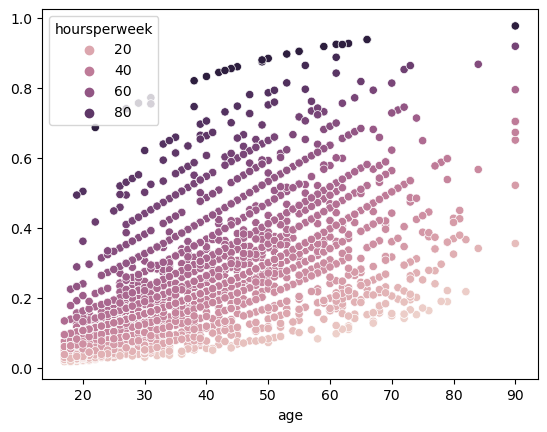

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "D:\Users\Partha.bora\Anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "D:\Users\Partha.bora\Anaconda3\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "D:\Users\Partha.bora\Anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "D:\Users\Partha.bora\Anaconda3\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connecti

In [43]:
sns.scatterplot(x=X_test["age"],
                y=lr.predict_proba(X_test[["age", "hoursperweek"]])[:,1],
                hue=X_test["hoursperweek"]
)

In [ ]:
#Feature Engioneering

In [ ]:
#Regularization

In [ ]:
#Tuning a regularized model + #Optimize the model